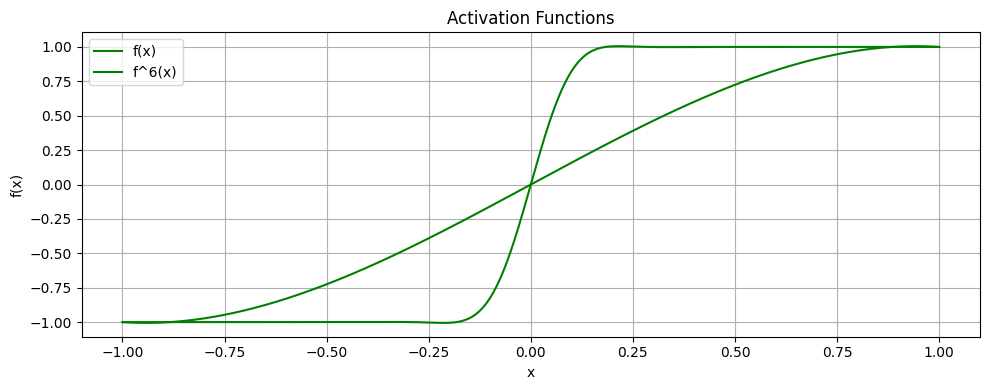

In [2]:

import matplotlib.pyplot  as plt
import math
import numpy as np

# aSOR
def f(x):
    # return x*(2 - x)
    # return -0.5 * x**3 + 1.5 * x
    return -3/5 * x**3 + 8/5 * x
    # return -8/19*x**3 + 27/19*x
    # return -1/6 * x**7 + 7/6 * x
    # return x*(3 - x)**2 / 4

     
fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4))

# Generate x values
x = np.linspace(-1, 1, 10000)
# Plot activation functions
ax1.plot(x, f(x), label='f(x)', color='green')
# ax1.plot(x, f(f(x)), label='f^2(x)', color='green')
# ax1.plot(x, f(f(f(x))), label='f^3(x)', color='green')
# ax1.plot(x, f(f(f(x))), label='f^4(x)', color='green')
# ax1.plot(x, f(f(f(f(x)))), label='f^5(x)', color='green')
ax1.plot(x, f(f(f(f(f(x))))), label='f^6(x)', color='green')

ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

-0.999356551400189
-0.996652912909365


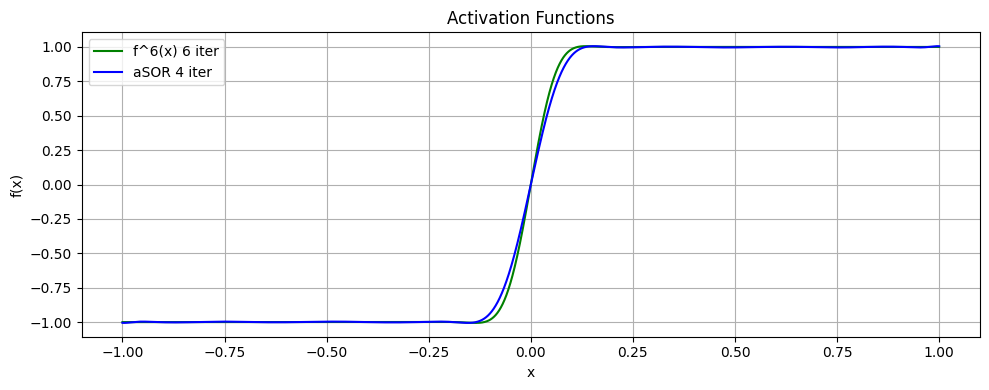

In [3]:
def sign(x, iters):
    for i in range(iters):
        x = f(x)
    return x

def sign_fast(x, K):
    for i in range(len(K)):
        x = f(K[i] * x)
    return x

print(sign(-0.25, 6))

K = [1.51, 1.28, 1.06, 1.01]
print(sign_fast(-0.5, K))


fig, (ax1) = plt.subplots(1, 1, figsize=(10, 4))

# Generate x values
x = np.linspace(-1, 1, 10000)
# Plot activation functions
ax1.plot(x, f(f(f(f(f(f(x)))))), label='f^6(x) 6 iter', color='green')
ax1.plot(x, sign_fast(x, K), label='aSOR 4 iter', color='blue')

ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [4]:
def relaxFactor(f, alpha, sigma_i, upper):
    """
    Calculate the relaxation factors for the adaptive successive over-relaxation (aSOR) method.

    Parameters:
    f (function): The function used in the iterative process.
    alpha (float): The precision parameter, determines the convergence criteria.
    sigma_i (float): The initial input range lower bound, typically a small positive number.

    Returns:
    list: A list of relaxation factors k_i.
    """
    epsilon_i = sigma_i
    K = []  # List to store the relaxation factors

    while 1 - epsilon_i > 2 ** (-alpha):
        # Define a helper function to compute the objective for argmax
        def objective(k):
            return min(f(k * epsilon_i), f(k))

        # Find the optimal k_i that maximizes the objective function
        # Note: This is a simplified approach; in practice, you might need a numerical optimization method
        # Here, we use a simple grid search for demonstration purposes
        from scipy.optimize import minimize_scalar
        # We minimize the negative of the objective function to find the maximum
        res = minimize_scalar(lambda k: -objective(k), bounds=(1, upper), method='bounded')
        k_i = res.x

        # Append the computed k_i to the list K
        K.append(k_i)

        # Update epsilon_i for the next iteration
        epsilon_i = f(k_i)

    return K



# Example usage:
if __name__ == "__main__":
    # Define the function f(z) = -1/2 * z^3 + 3/2 * z
    def f_sign(z):
        return -0.5 * z**3 + 1.5 * z

    alpha = 10  # Precision parameter
    sigma_i = 0  # Initial input range lower bound

    K_sign = relaxFactor(f_sign, alpha, sigma_i, 2)
    print("Relaxation factors:", K_sign)


    def sign(x, iters):
        for i in range(iters):
            x = f_sign(x)
        return x

    def sign_fast(x, K):
        for i in range(len(K)):
            x = f_sign(K[i] * x)
        return x

    input = 0.6

    print(sign(input, 6))

    # K_sign = [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
    print(sign_fast(input, K_sign))

Relaxation factors: [1.38197046028712, 1.1369694482754693, 1.0148934414928128]
0.9999999999999999
0.9999928589826494


In [5]:
def f_inv(z):
    return z * (2 - z)
def inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki * b * (2 - ki*a)
        # print(2 - ki*a, end=' ')
        a = ki * a * (2 - ki*a)
        # print(a, b)
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 4)
print(K_inv)

xx = 0.44673946

# 1 / x
print(inverse(xx, K_inv))
print(1 / xx)

[1.708209458521407, 1.3347202619383138, 1.0593437148393925, 1.0017626264306325]
2.2384353387500675
2.2384411710575107


In [6]:
def f_sqrt_inv(z):
    return z*(3 - z)**2 / 4
    
def sqrt_inverse(x, K):
    a = x
    b = 1

    for ki in K:
        b = ki**0.5 / 2 * b * (3 - ki*a)
        # print(ki**0.5 / 2, ki / 4)
        a = ki / 4 * a * (3 - ki*a)**2
    return b

K_inv = relaxFactor(f_inv, 10, sigma_i, 3)
print(K_inv)

xx = 8
# 1 / \sqrt(x)
print(sqrt_inverse(xx/10, K_inv)/math.sqrt(10))
print(1/(xx**0.5))

# \sqrt(x)
print(sqrt_inverse(xx, K_inv) * xx)
print(xx**0.5)

[1.472141915860566, 1.1254419159515154, 1.007928806890655]
0.3535533476664011
0.35355339059327373
-11713989791.91626
2.8284271247461903


In [7]:
# x ** -(1/m)
m = 2
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m
def pow_m_inv(x, K):
    y = 1

    for ki in K:
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 12, sigma_i, 2.5)
print(K_inv)

xx = 0.4
# x ** -(1/m)
print(pow_m_inv(xx, K_inv))
print(1/(xx**(1/m)))


[1.3541058464884248, 1.1149359182105651, 1.0103756551364902]
1.581138795470078
1.5811388300841895


In [8]:
acc = 0
for i in range(64):
    acc += i
print(acc)

2016


[ 1.00000000e+00  9.80785280e-01  9.23879533e-01  8.31469612e-01
  7.07106781e-01  5.55570233e-01  3.82683432e-01  1.95090322e-01
  6.12323400e-17 -1.95090322e-01 -3.82683432e-01 -5.55570233e-01
 -7.07106781e-01 -8.31469612e-01 -9.23879533e-01 -9.80785280e-01
 -1.00000000e+00]
y1 [0.1483158359358249, 0.2760824230971085, 0.22300969237908772, 0.1571439267439196, 0.09729455098395187, 0.053363084859021075, 0.02614377117192821, 0.01153306973094301, 0.004615374341067856, 0.0016869628008844356, 0.0005666636293385484, 0.00017589109960282386, 5.071679750376084e-05, 1.3637111404579169e-05, 3.4539775871475133e-06, 8.516059557746178e-07]
[5.941511797040485e+24, 1.169541809814754e+25, 1.1496162469606082e+25, 1.0941612288017705e+25, 1.04136908964163e+25, 9.5841949210978e+24, 8.846544045079278e+24, 7.879512901804471e+24, 7.078895655124142e+24, 6.121610371039506e+24, 5.39810189425701e+24, 4.5774150687374226e+24, 4.040641608329104e+24, 3.4469615256291256e+24, 3.1678579326103084e+24, 2.8536443163104927e

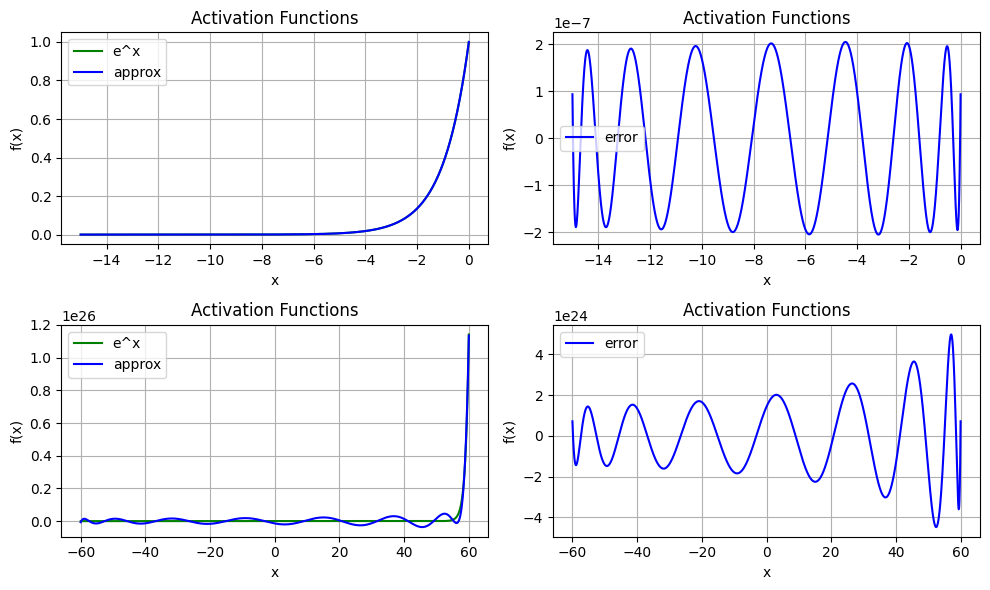

In [9]:
import matplotlib.pyplot  as plt
import math
import numpy as np
from numpy.polynomial import Chebyshev
from random import *

pi = math.pi
cos = math.cos
sin = math.sin 

exp_length = 15
exp_length2 = 120

def target_function(x):
    return pow(math.e, x)

def targ_1(x):
    return pow(math.e, (exp_length)/2*(x-1))
    
def targ_2(x):
    return pow(math.e, (exp_length2)/2*(x))
    
cheby_deg = 16

# x = np.array([-1 + 2*i/32 for i in range(33)])
x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)

y1 = np.array([targ_1(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y1, deg = cheby_deg-1)
y1 = chebyPoly.coef
y1 = list(y1)
print("y1", y1)

y2 = np.array([targ_2(xx) for xx in x])
chebyPoly = Chebyshev.fit(x, y2, deg = cheby_deg-1)
y2 = chebyPoly.coef
y2 = list(y2)
print(y2)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn1 = 0
for i in range(0, cheby_deg):
	pn1 = pn1 + y1[i] * T[i]
     
pn2 = 0
for i in range(0, cheby_deg):
	pn2 = pn2 + y2[i] * T[i]

# Generate x values
x = np.linspace(-exp_length, 0, 10000)

# Create the figure with two subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 6))

# Plot activation functions
ax1.plot(x, target_function(x), label='e^x', color='green')
ax1.plot(x, pn1(x*2/exp_length+1), label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, target_function(x) - pn1(x*2/exp_length+1), label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()


x = np.linspace(-exp_length2/2, exp_length2/2, 10000)
# Plot activation functions
ax3.plot(x, target_function(x), label='e^x', color='green')
ax3.plot(x, pn2(x*2/exp_length2), label='approx', color='blue')
ax3.set_title('Activation Functions')
ax3.set_xlabel('x')
ax3.set_ylabel('f(x)')
ax3.grid(True)
ax3.legend()

# Plot activation functions
ax4.plot(x, target_function(x) - pn2(x*2/exp_length2), label='error', color='blue')
ax4.set_title('Activation Functions')
ax4.set_xlabel('x')
ax4.set_ylabel('f(x)')
ax4.grid(True)
ax4.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

In [10]:
# standard
def softmax1(x):
    e_x = np.exp(x - np.max(x))
    print("max_x: ",np.max(x))
    return e_x / e_x.sum(axis=0)

# optimized
def softmax2(x):
    e_x = np.exp(x)
    return e_x / e_x.sum(axis=0)

# x ** -(1/m)
m = 1
def f_pow_m_inv(z):
    return z*((m+1) - z**m) / m

def pow_m_inv(x, K):
    y = 1
    for ki in K:
        y = ki*y*((m+1) - x*(ki*y)**m) / m
    return y

K_inv = relaxFactor(f_pow_m_inv, 10, sigma_i, 4)
print(K_inv)

delta = 4

# approx
def approx_e1(x):
    return pn1(x/(exp_length/2)+1)


# [-60, 60]
def approx_softmax1(x):
    # [-120, 0]
    xx = x - exp_length/2*delta
    # [-15, 0]
    xx = xx / (delta)
    # [-15, 0]
    e_x = approx_e1(xx)
    print(pow(e_x, delta)[:4])

    zi = pow(e_x, delta)
    temp = zi.sum(axis=0)

    inv_temp = pow_m_inv(temp / 2, K_inv) / 2
    print("sumi:", temp, 1/temp, inv_temp)
    e_x = zi * inv_temp

    return e_x

data = np.random.uniform(-exp_length/2*delta, exp_length/2*delta, [128])

print("error with optimized softmax", max(softmax1(data) - softmax2(data)))
print("sum of standard softmax", sum(softmax1(data)))

appro_softmax_output = approx_softmax1(data)

print(appro_softmax_output[:4])
print(softmax1(data)[:4])

print("error with approx1 softmax", max(softmax1(data) - appro_softmax_output))
print("sum of approx1 softmax", sum(appro_softmax_output))


[1.708209458521407, 1.3347202619383138, 1.0593437148393925, 1.0017626264306325]
max_x:  29.94206653517228
error with optimized softmax 1.34106353887572e-29
max_x:  29.94206653517228
sum of standard softmax 0.9999999999999997
[1.40141118e-23 1.51839734e-20 4.05665186e-06 7.48589926e-04]
sumi: 2.091440789644755 0.4781392831923569 0.47750088083774456
[6.69175074e-24 7.25036066e-21 1.93705484e-06 3.57452349e-04]
max_x:  29.94206653517228
[7.88268132e-24 6.79711740e-21 1.93960949e-06 3.57931302e-04]
max_x:  29.94206653517228
error with approx1 softmax 0.0006024062858198675
sum of approx1 softmax 0.9986648192753579


1.523


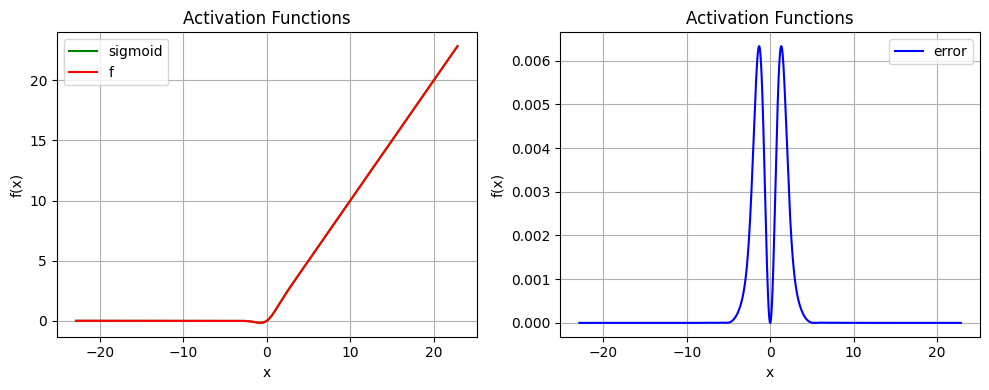

In [46]:
import numpy as np
from scipy.stats import norm

length = 15
cheby_deg = 42

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def CDF(x):
    return norm.cdf(x)

def target_function(x):
    # return sigmoid(x)
    return CDF(x)

def targ_2(x):
    x *= length
    return target_function(x)
    # return CDF(x)

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
y = np.array([targ_2(xx) for xx in x])
# print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
# print("y: ", y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]
     
def f(x):
    return -0.5 * x**3 + 1.5 * x
    # return x*x

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

iter = 1
scaler = pow(1.523, iter)
print(scaler)

def approx(x, iter):
    temp = 2 * pn(x/(length*scaler)) - 1
    for i in range(iter):
        temp = f(temp)
    return temp / 2 + 0.5

# Generate x values
x = np.linspace(-length*scaler, length*scaler, 10000)
# Plot activation functions
ax1.plot(x, target_function(x)*x, label='sigmoid', color='green')
ax1.plot(x, approx(x, iter)*x, label='f', color='red')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, target_function(x)*x - approx(x, iter)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

/tmp/ipykernel_436972/2498697876.py:20: RuntimeWarning: overflow encountered in multiply
  y = ki*y*((m+1) - x*(ki*y)**m) / m
/home/yyf/miniforge3/envs/sage/lib/python3.10/site-packages/matplotlib/ticker.py:2094: RuntimeWarning: overflow encountered in multiply
  steps = self._extended_steps * scale


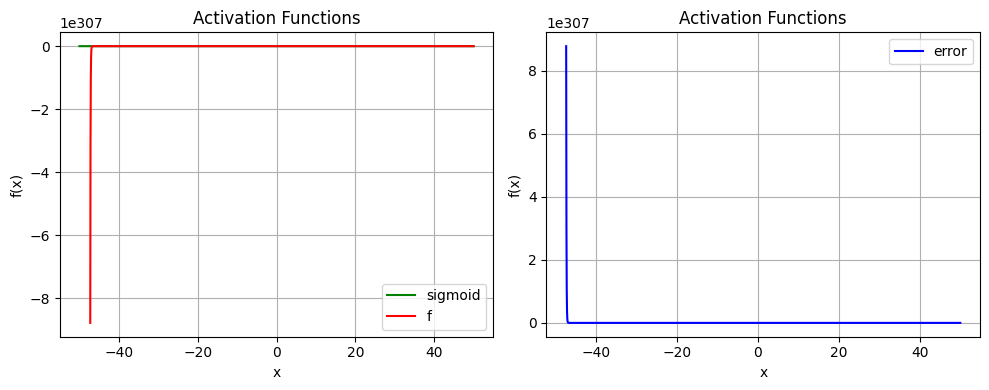

In [12]:
import numpy as np
from scipy.stats import norm

length = 50

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def target_function(x):
    return sigmoid(x)
    # return CDF(x)

def targ_2(x):
    x *= length
    return target_function(x)
    # return CDF(x)

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

def approx(x, iter):
    temp = np.exp(-x) + 1
    temp = pow_m_inv(temp/2, K_inv)/2
    return temp

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, target_function(x), label='sigmoid', color='green')
ax1.plot(x, approx(x, iter), label='f', color='red')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, target_function(scaler*x) - approx(x, iter), label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()

[ 1.00000000e+00  9.87688341e-01  9.51056516e-01  8.91006524e-01
  8.09016994e-01  7.07106781e-01  5.87785252e-01  4.53990500e-01
  3.09016994e-01  1.56434465e-01  6.12323400e-17 -1.56434465e-01
 -3.09016994e-01 -4.53990500e-01 -5.87785252e-01 -7.07106781e-01
 -8.09016994e-01 -8.91006524e-01 -9.51056516e-01 -9.87688341e-01
 -1.00000000e+00]
[9.99999713e-01 9.99999606e-01 9.99999009e-01 9.99995806e-01
 9.99973848e-01 9.99796524e-01 9.98353243e-01 9.88394767e-01
 9.38837144e-01 7.82943347e-01 5.00000000e-01 2.17056653e-01
 6.11628558e-02 1.16052326e-02 1.64675711e-03 2.03476009e-04
 2.61520748e-05 4.19402199e-06 9.90845147e-07 3.93746561e-07
 2.86651572e-07]
[0.4999999999999999, 0.6234577655281024, 2.1938197590748047e-17, -0.17602455084661336, 3.8397062060234874e-17, 0.07617494799506995, 2.5058771037119205e-16, -0.03371905009934949, 1.9442573437879256e-16, 0.014114717269537384, 6.136919126806236e-16, -0.005457385541723384, 5.961195387018996e-16, 0.0019361656181797757, 2.3980071897640697e

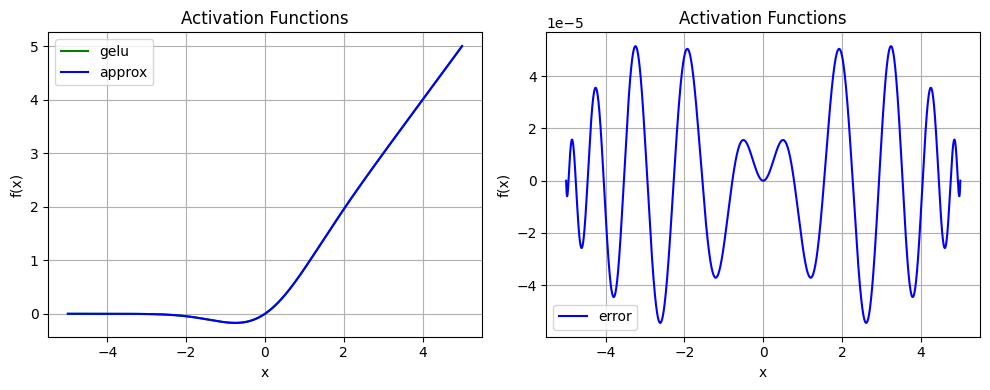

In [13]:
from scipy.stats import norm

length = 5

def relu(x):
    return np.maximum(0, x)

def gelu(x):
    return x * norm.cdf(x)

def targ_2(x):
    x *= length
    return norm.cdf(x)
    
cheby_deg = 20

x = np.array([cos(pi / 2 * (2*i/cheby_deg)) for i in range(cheby_deg+1)])
print(x)
y = np.array([targ_2(xx) for xx in x])
print(y)

chebyPoly = Chebyshev.fit(x, y, deg = cheby_deg-1)
y = chebyPoly.coef
y = list(y)
print(y)

T0 = np.polynomial.Polynomial(coef=[1])
T1 = np.polynomial.Polynomial(coef=[0,1])
T = [T0, T1]
for i in range(cheby_deg - 2):
    a = T[-1]
    b = T[-2]
    c = 2 * np.polynomial.Polynomial(coef=[0,1]) * a - b
    T.append(c)

pn = 0
for i in range(0, cheby_deg):
	pn = pn + y[i] * T[i]
     
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Generate x values
x = np.linspace(-length, length, 10000)
# Plot activation functions
ax1.plot(x, gelu(x), label='gelu', color='green')
ax1.plot(x, pn(x/length)*x, label='approx', color='blue')
ax1.set_title('Activation Functions')
ax1.set_xlabel('x')
ax1.set_ylabel('f(x)')
ax1.grid(True)
ax1.legend()

# Plot activation functions
ax2.plot(x, gelu(x) - pn(x/length)*x, label='error', color='blue')
ax2.set_title('Activation Functions')
ax2.set_xlabel('x')
ax2.set_ylabel('f(x)')
ax2.grid(True)
ax2.legend()

# Adjust layout and display
plt.tight_layout()
plt.show()